In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import keras

from keras.layers import Dense, Activation
from keras.utils import np_utils
from keras.models import Sequential

Using TensorFlow backend.


In [2]:
mean_01 = np.array([1, 1])
cov_01 = np.array([[2.9, 1.4], [1.7, 1.5]])

mean_02 = np.array([4, 7])
cov_02 = np.array([[2, -0.7], [-0.7, 1.5]])

data_01 = np.random.multivariate_normal(mean_01, cov_01, 500)
data_02 = np.random.multivariate_normal(mean_02, cov_02, 500)
print data_01.shape
print data_02.shape

(500, 2)
(500, 2)


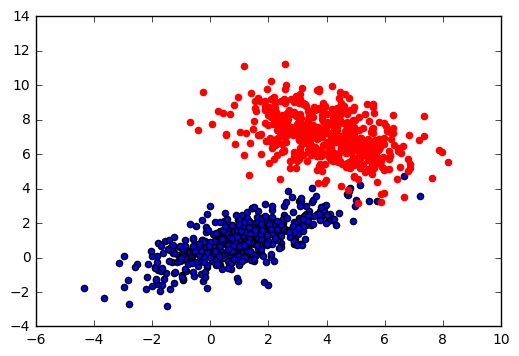

In [3]:
plt.figure(0)

plt.scatter(data_01[:, 0], data_01[:, 1])
plt.scatter(data_02[:, 0], data_02[:, 1], color='red')

plt.show()

In [4]:
all_data = np.zeros((1000, 3))

all_data[:500, :2] = data_01

all_data[500:, :2] = data_02
all_data[500:, -1] = 1

np.random.shuffle(all_data)
print all_data[:10]

[[ 3.43844096  7.38206195  1.        ]
 [ 5.65579685  6.34842275  1.        ]
 [ 0.66322188  1.17601824  0.        ]
 [ 3.38605138  8.46188726  1.        ]
 [ 2.47836232  6.58722359  1.        ]
 [ 4.99260731  2.96717432  0.        ]
 [ 0.65267128 -0.37703532  0.        ]
 [ 4.69054813  7.53211704  1.        ]
 [ 3.90726093  6.56129401  1.        ]
 [ 2.26280922  1.90551397  0.        ]]


In [5]:
split = int(0.8 * all_data.shape[0])

train = all_data[:split]
test = all_data[split:]

print train.shape, test.shape

X_train = train[:, :-1]
X_test = test[:, :-1]

y_train = np_utils.to_categorical(train[:, -1])
y_test = np_utils.to_categorical(test[:, -1])

print '-'*80
print X_train.shape, X_test.shape
print y_train.shape, y_test.shape

(800, 3) (200, 3)
--------------------------------------------------------------------------------
(800, 2) (200, 2)
(800, 2) (200, 2)


In [6]:
print train[:10, -1]
print y_train[:10]

[ 1.  1.  0.  1.  1.  0.  0.  1.  1.  0.]
[[ 0.  1.]
 [ 0.  1.]
 [ 1.  0.]
 [ 0.  1.]
 [ 0.  1.]
 [ 1.  0.]
 [ 1.  0.]
 [ 0.  1.]
 [ 0.  1.]
 [ 1.  0.]]


In [35]:
# Network Model

model = Sequential()

model.add(Dense(3, input_shape=(2,)))
model.add(Activation('sigmoid'))

model.add(Dense(2))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 3)                 9         
_________________________________________________________________
activation_7 (Activation)    (None, 3)                 0         
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 8         
_________________________________________________________________
activation_8 (Activation)    (None, 2)                 0         
Total params: 17.0
Trainable params: 17.0
Non-trainable params: 0.0
_________________________________________________________________


In [36]:
hist = model.fit(X_train, y_train,
                epochs=80,
                shuffle=True,
                validation_data=(X_test, y_test), verbose=2)

Train on 800 samples, validate on 200 samples
Epoch 1/80
0s - loss: 0.7176 - acc: 0.2462 - val_loss: 0.7131 - val_acc: 0.4800
Epoch 2/80
0s - loss: 0.7045 - acc: 0.5450 - val_loss: 0.7011 - val_acc: 0.5000
Epoch 3/80
0s - loss: 0.6916 - acc: 0.5538 - val_loss: 0.6890 - val_acc: 0.5000
Epoch 4/80
0s - loss: 0.6791 - acc: 0.5962 - val_loss: 0.6768 - val_acc: 0.5950
Epoch 5/80
0s - loss: 0.6666 - acc: 0.6700 - val_loss: 0.6654 - val_acc: 0.6850
Epoch 6/80
0s - loss: 0.6541 - acc: 0.7563 - val_loss: 0.6533 - val_acc: 0.7500
Epoch 7/80
0s - loss: 0.6415 - acc: 0.8175 - val_loss: 0.6411 - val_acc: 0.8000
Epoch 8/80
0s - loss: 0.6289 - acc: 0.8387 - val_loss: 0.6289 - val_acc: 0.8300
Epoch 9/80
0s - loss: 0.6160 - acc: 0.8750 - val_loss: 0.6164 - val_acc: 0.8400
Epoch 10/80
0s - loss: 0.6031 - acc: 0.8962 - val_loss: 0.6035 - val_acc: 0.8500
Epoch 11/80
0s - loss: 0.5902 - acc: 0.9037 - val_loss: 0.5911 - val_acc: 0.8600
Epoch 12/80
0s - loss: 0.5771 - acc: 0.9200 - val_loss: 0.5780 - val_acc

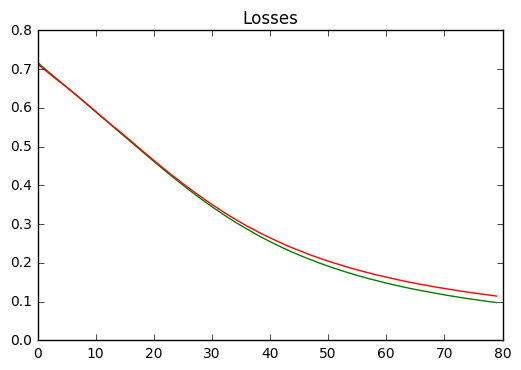

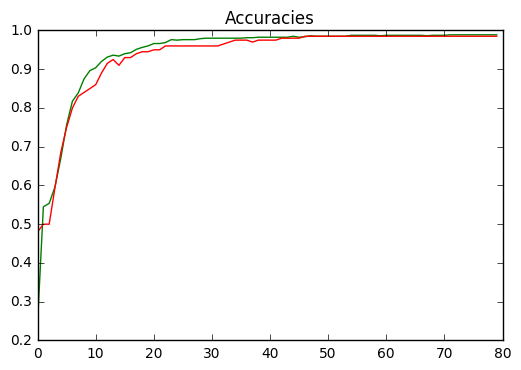

In [37]:
h_data = hist.history

plt.figure(0)
plt.title('Losses')
plt.plot(h_data['loss'], 'green')
plt.plot(h_data['val_loss'], 'red')

plt.figure(1)
plt.title('Accuracies')
plt.plot(h_data['acc'], 'green')
plt.plot(h_data['val_acc'], 'red')

plt.show()

In [9]:
import sklearn
from sklearn.datasets import make_moons

(1000, 2) (1000,)
(1000, 2) Categorical data


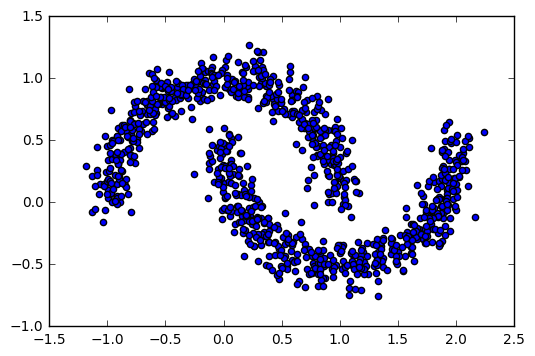

In [10]:
X, y = make_moons(1000, shuffle=True, noise=0.1)
print X.shape, y.shape

plt.scatter(X[:, 0], X[:, 1])
y = np_utils.to_categorical(y)
print y.shape, "Categorical data"

In [11]:
# Network Model

model = Sequential()

model.add(Dense(3, input_shape=(2,)))
model.add(Activation('sigmoid'))
model.add(Dense(2))
model.add(Activation('sigmoid'))

model.add(Dense(2))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 3)                 9         
_________________________________________________________________
activation_4 (Activation)    (None, 3)                 0         
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 8         
_________________________________________________________________
activation_5 (Activation)    (None, 2)                 0         
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 6         
_________________________________________________________________
activation_6 (Activation)    (None, 2)                 0         
Total params: 23.0
Trainable params: 23.0
Non-trainable params: 0.0
_________________________________________________________________


In [12]:
hist = model.fit(X[:800], y[:800],
                epochs=100,
                shuffle=True,
                validation_data=(X[800:], y[800:]), verbose=2)

Train on 800 samples, validate on 200 samples
Epoch 1/100
0s - loss: 0.7077 - acc: 0.4900 - val_loss: 0.6823 - val_acc: 0.5400
Epoch 2/100
0s - loss: 0.6973 - acc: 0.4900 - val_loss: 0.6771 - val_acc: 0.5400
Epoch 3/100
0s - loss: 0.6892 - acc: 0.4900 - val_loss: 0.6733 - val_acc: 0.5400
Epoch 4/100
0s - loss: 0.6829 - acc: 0.4900 - val_loss: 0.6703 - val_acc: 0.5400
Epoch 5/100
0s - loss: 0.6776 - acc: 0.4900 - val_loss: 0.6676 - val_acc: 0.5400
Epoch 6/100
0s - loss: 0.6731 - acc: 0.4900 - val_loss: 0.6651 - val_acc: 0.5400
Epoch 7/100
0s - loss: 0.6689 - acc: 0.5138 - val_loss: 0.6626 - val_acc: 0.6650
Epoch 8/100
0s - loss: 0.6650 - acc: 0.7388 - val_loss: 0.6598 - val_acc: 0.8600
Epoch 9/100
0s - loss: 0.6610 - acc: 0.8188 - val_loss: 0.6566 - val_acc: 0.8800
Epoch 10/100
0s - loss: 0.6571 - acc: 0.8362 - val_loss: 0.6535 - val_acc: 0.8750
Epoch 11/100
0s - loss: 0.6530 - acc: 0.8425 - val_loss: 0.6496 - val_acc: 0.8750
Epoch 12/100
0s - loss: 0.6490 - acc: 0.8387 - val_loss: 0.64

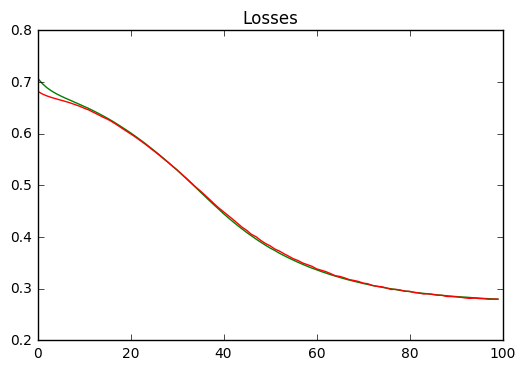

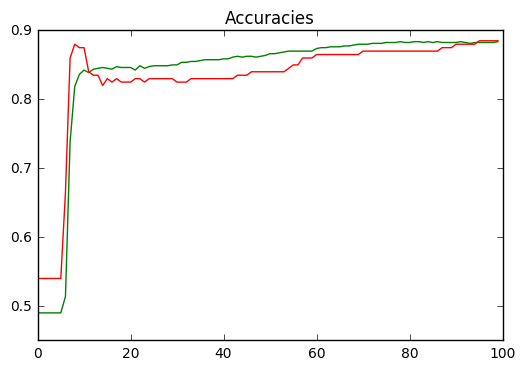

In [13]:
h_data = hist.history

plt.figure(0)
plt.title('Losses')
plt.plot(h_data['loss'], 'green')
plt.plot(h_data['val_loss'], 'red')

plt.figure(1)
plt.title('Accuracies')
plt.plot(h_data['acc'], 'green')
plt.plot(h_data['val_acc'], 'red')

plt.show()

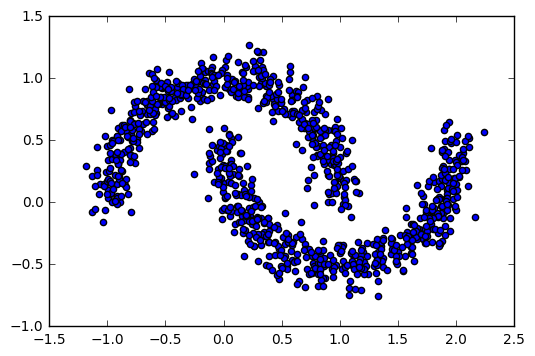

In [14]:
plt.scatter(X[:, 0], X[:, 1])

In [15]:
model.layers

In [16]:
from keras.models import Model

In [20]:
m = Model(inputs=model.input, outputs=model.layers[3].output)

In [21]:
o = m.predict(X)
print o.shape

(1000, 2)


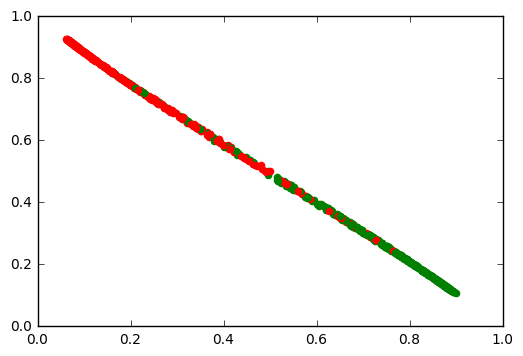

In [22]:
for ix in range(o.shape[0]):
    if y[ix, 0] == 1:
        plt.scatter(o[ix, 0], o[ix, 1], color='red')
    else:
        plt.scatter(o[ix, 0], o[ix, 1], color='green')
plt.show()